## Load and Prepare Data




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RepeatedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Load the 'WheatData.csv' file
df = pd.read_csv('/content/WheatData.csv')

# Define the independent variables (features)
X = df[['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG']]

# Define the dependent variable (target)
y = df['target']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=100)

print("Data loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data loaded and split successfully.
X_train shape: (168, 7)
X_test shape: (42, 7)
y_train shape: (168,)
y_test shape: (42,)


## Build Standard SVM Model



In [49]:
svm_model_standard = SVC(random_state=100)

svm_model_standard.fit(X_train, y_train)

print("Standard SVM model trained successfully.")

Standard SVM model trained successfully.


## Optimize SVM Model with Hyperparameter Tuning




In [50]:
#Define a dictionary param_grid with the hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

#Instantiate an SVC estimator with random_state=100
svc = SVC(random_state=100)

#Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, verbose=3, cv=5)

#Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

#Print the best parameters found by the grid search
best_params = grid_search.best_params_
print(f"Best parameters found by GridSearchCV: {best_params}")

#Train a new SVC model using these best_params and random_state=100
svm_model_optimized = SVC(**best_params, random_state=100)
svm_model_optimized.fit(X_train, y_train)

print("Optimized SVM model trained successfully.")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.853 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.941 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.909 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.939 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

## Present Learning Curve for Standard SVM




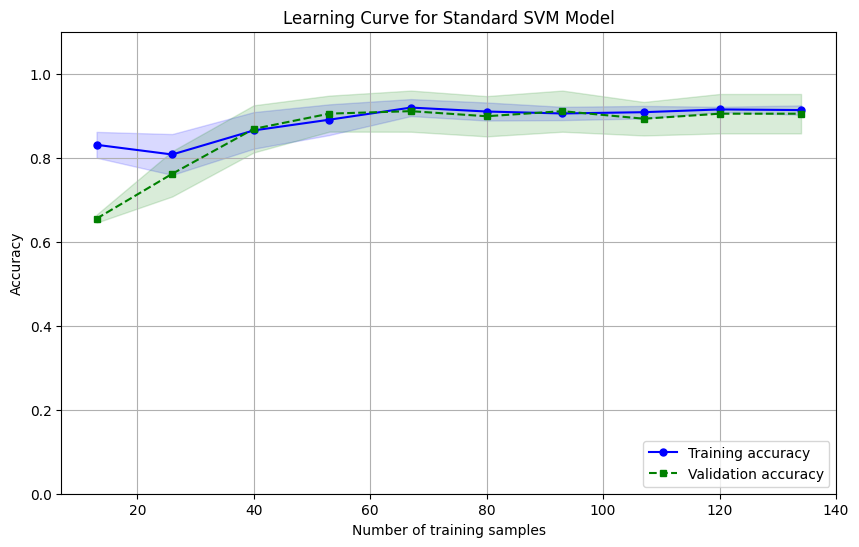

Learning curve plot for the standard SVM model generated using the new function.


In [51]:
# Define the plotting function
def plot_learning_curves(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy',
        random_state=100
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.grid(True)

    plt.plot(train_sizes, train_mean, color='blue', marker='o',
             markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')

    plt.legend(loc='lower right')
    plt.ylim([0.0, 1.1])
    plt.show()

# Call the function for the standard SVM model
plot_learning_curves(svm_model_standard, "Learning Curve for Standard SVM Model")

print("Learning curve plot for the standard SVM model generated using the new function.")

## Present Learning Curve for Optimized SVM




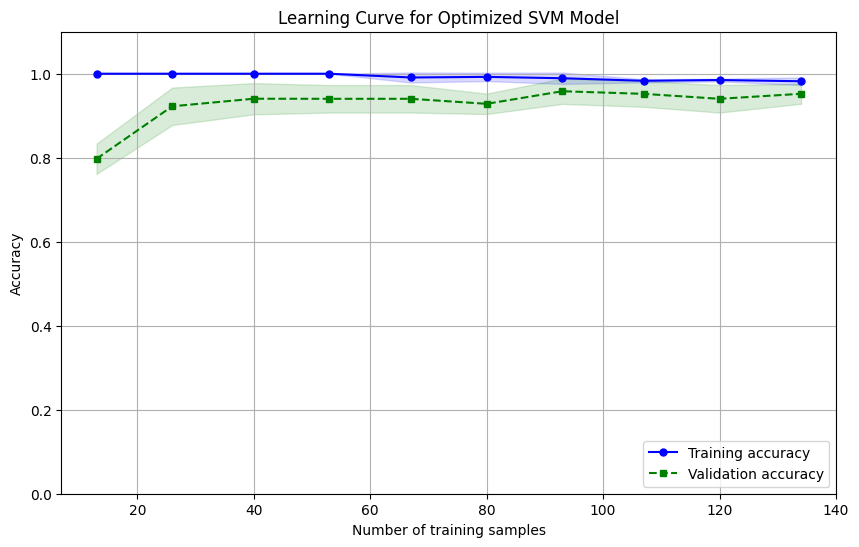

Learning curve plot for the optimized SVM model generated using the new function.


In [ ]:
# Call the previously defined function for the optimized SVM model
plot_learning_curves(svm_model_optimized, "Learning Curve for Optimized SVM Model")

print("Learning curve plot for the optimized SVM model generated using the new function.")

## Present Model Analysis Box Plot for Standard SVM


Model Evaluation - Accuracy Score (Repeated K-Fold Cross-Validation)
Standard SVM 0.9067 +/- 0.0666
Optimized SVM 0.9648 +/- 0.0402




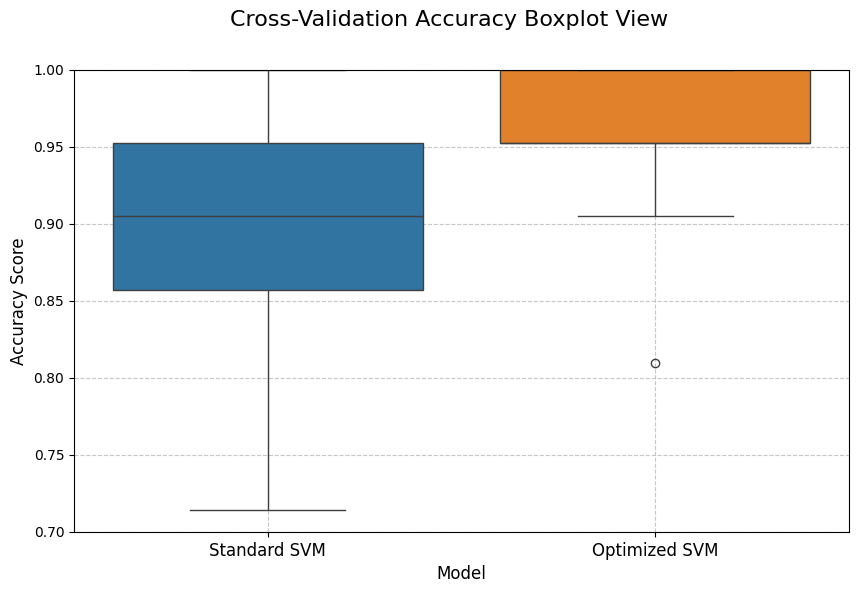

Combined box plot for standard and optimized SVM models generated based on cross-validation accuracy.


In [ ]:
#Define the models to evaluate
models = []
# Using the already trained models from the notebook state
models.append(('Standard SVM', svm_model_standard))
models.append(('Optimized SVM', svm_model_optimized))

# Model Evaluation using Repeated K-Fold Cross-Validation
results = []
names = []
scoring = 'accuracy'
print('Model Evaluation - Accuracy Score (Repeated K-Fold Cross-Validation)')
for name, model in models:
    rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    # Use the full dataset X, y for cross_val_score as it handles its own splits
    cv_results = cross_val_score(model, X, y, cv=rkf, scoring=scoring, n_jobs=-1) # n_jobs=-1 to speed up
    results.append(cv_results)
    names.append(name)
    print('{} {:.4f} +/- {:.4f}'.format(name, cv_results.mean(), cv_results.std()))

print('\n')

# Boxplot View for Cross-Validation Accuracy
plt.figure(figsize=(10, 6)) # Adjusted figure size for better readability
plt.suptitle('Cross-Validation Accuracy Boxplot View', fontsize=16)
sns.boxplot(data=results)
plt.xticks(ticks=range(len(names)), labels=names, fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim([0.7, 1.0]) # Adjusted for typical accuracy range
plt.show()

print("Combined box plot for standard and optimized SVM models generated based on cross-validation accuracy.")

## Present Model Analysis Box Plot for Optimized SVM



In [ ]:
#The box plot for the optimized SVM model's cross-validation accuracy
#is now combined with the standard SVM model's box plot in the previous cell.
print("See previous cell for combined Cross-Validation Accuracy Boxplot.")

See previous cell for combined Cross-Validation Accuracy Boxplot.


## Balance Classes with SMOTE and Present Classification Reports




In [52]:
#Define target names for the classification report
target_names = ['Kama', 'Rosa', 'Canadian']

#Instantiate SMOTE and apply it to the training data
smote = SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}, {y_train.shape}")
print(f"SMOTE-resampled training set shape: {X_train_smote.shape}, {y_train_smote.shape}")
print(f"Class distribution before SMOTE: {y_train.value_counts()}")
print(f"Class distribution after SMOTE: {y_train_smote.value_counts()}")

#Create and train a standard SVM model with SMOTE-resampled data
svm_model_standard_smote = SVC(random_state=100)
svm_model_standard_smote.fit(X_train_smote, y_train_smote)
print("Standard SVM model trained with SMOTE data successfully.")

#Create and train an optimized SVM model with SMOTE-resampled data
# best_params should be available from previous steps
svm_model_optimized_smote = SVC(**best_params, random_state=100)
svm_model_optimized_smote.fit(X_train_smote, y_train_smote)
print("Optimized SVM model trained with SMOTE data successfully.")

#Make predictions on the X_test data using all four trained models
y_pred_standard = svm_model_standard.predict(X_test)
y_pred_optimized = svm_model_optimized.predict(X_test)
y_pred_standard_smote = svm_model_standard_smote.predict(X_test)
y_pred_optimized_smote = svm_model_optimized_smote.predict(X_test)

#Print the classification reports
print("\n--- Classification Report for Standard SVM (Original Data) ---")
print(classification_report(y_test, y_pred_standard, target_names=target_names))

print("\n--- Classification Report for Optimized SVM (Original Data) ---")
print(f"Best Parameters: {best_params}")
print(classification_report(y_test, y_pred_optimized, target_names=target_names))

print("\n--- Classification Report for Standard SVM (SMOTE Data) ---")
print(classification_report(y_test, y_pred_standard_smote, target_names=target_names))

print("\n--- Classification Report for Optimized SVM (SMOTE Data) ---")
print(f"Best Parameters: {best_params}")
print(classification_report(y_test, y_pred_optimized_smote, target_names=target_names))

Original training set shape: (168, 7), (168,)
SMOTE-resampled training set shape: (168, 7), (168,)
Class distribution before SMOTE: target
0    56
2    56
1    56
Name: count, dtype: int64
Class distribution after SMOTE: target
0    56
2    56
1    56
Name: count, dtype: int64
Standard SVM model trained with SMOTE data successfully.
Optimized SVM model trained with SMOTE data successfully.

--- Classification Report for Standard SVM (Original Data) ---
              precision    recall  f1-score   support

        Kama       0.79      0.79      0.79        14
        Rosa       0.92      0.79      0.85        14
    Canadian       0.88      1.00      0.93        14

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42


--- Classification Report for Optimized SVM (Original Data) ---
Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1